In [1]:
from google.colab import files

uploaded = files.upload()


Saving Download Data - STOCK_IN_XBOM_500825.csv to Download Data - STOCK_IN_XBOM_500825.csv


In [38]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot,iplot
import plotly.express as px
import plotly.io as pio
from plotly.offline import iplot
%matplotlib inline

In [7]:
Britannia=pd.read_csv('Download Data - STOCK_IN_XBOM_500825.csv')

In [8]:
Britannia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    247 non-null    object
 1   Open    247 non-null    object
 2   High    247 non-null    object
 3   Low     247 non-null    object
 4   Close   247 non-null    object
 5   Volume  247 non-null    object
dtypes: object(6)
memory usage: 11.7+ KB


In [10]:
Britannia.describe()

,Date,Open,High,Low,Close,Volume
count,247,247,247,247,247,247
unique,247,239,240,240,247,246
top,03/15/2024,"4,679.95","4,830.00","4,860.00","4,976.25","5,088"
freq,1,3,2,3,1,2


In [11]:
Britannia.head()

,Date,Open,High,Low,Close,Volume
0,03/15/2024,"4,938.05","5,008.55","4,919.15","4,976.25","10,425"
1,03/14/2024,"4,826.05","4,953.95","4,786.45","4,938.50","4,351"
2,03/13/2024,"4,868.60","4,975.00","4,824.35","4,857.50","6,009"
3,03/12/2024,"4,937.20","4,937.20","4,852.45","4,868.25","2,049"
4,03/11/2024,"4,887.30","4,956.00","4,874.95","4,936.75","2,557"


Removing the commas and coverting it to datetime frame format


In [14]:
# Convert 'Date' column to datetime
Britannia['Date'] = pd.to_datetime(Britannia['Date'], format='%m/%d/%Y')

In [15]:
# Remove commas from numeric columns and convert to appropriate types
Britannia['Open'] = Britannia['Open'].str.replace(',', '').astype(float)
Britannia['High'] = Britannia['High'].str.replace(',', '').astype(float)
Britannia['Low'] = Britannia['Low'].str.replace(',', '').astype(float)
Britannia['Close'] = Britannia['Close'].str.replace(',', '').astype(float)
Britannia['Volume'] = Britannia['Volume'].str.replace(',', '').astype(int)

# Display the DataFrame to verify
print(Britannia.head())


        Date     Open     High      Low    Close  Volume
0 2024-03-15  4938.05  5008.55  4919.15  4976.25   10425
1 2024-03-14  4826.05  4953.95  4786.45  4938.50    4351
2 2024-03-13  4868.60  4975.00  4824.35  4857.50    6009
3 2024-03-12  4937.20  4937.20  4852.45  4868.25    2049
4 2024-03-11  4887.30  4956.00  4874.95  4936.75    2557


In [17]:
# exploring the data

print(f'dataframe contains stock prices between {Britannia.Date.min()} {Britannia.Date.max()}')
print(f'total days = {(Britannia.Date.max()  - Britannia.Date.min()).days} days')

dataframe contains stock prices between 2023-03-15 00:00:00 2024-03-15 00:00:00
total days = 366 days


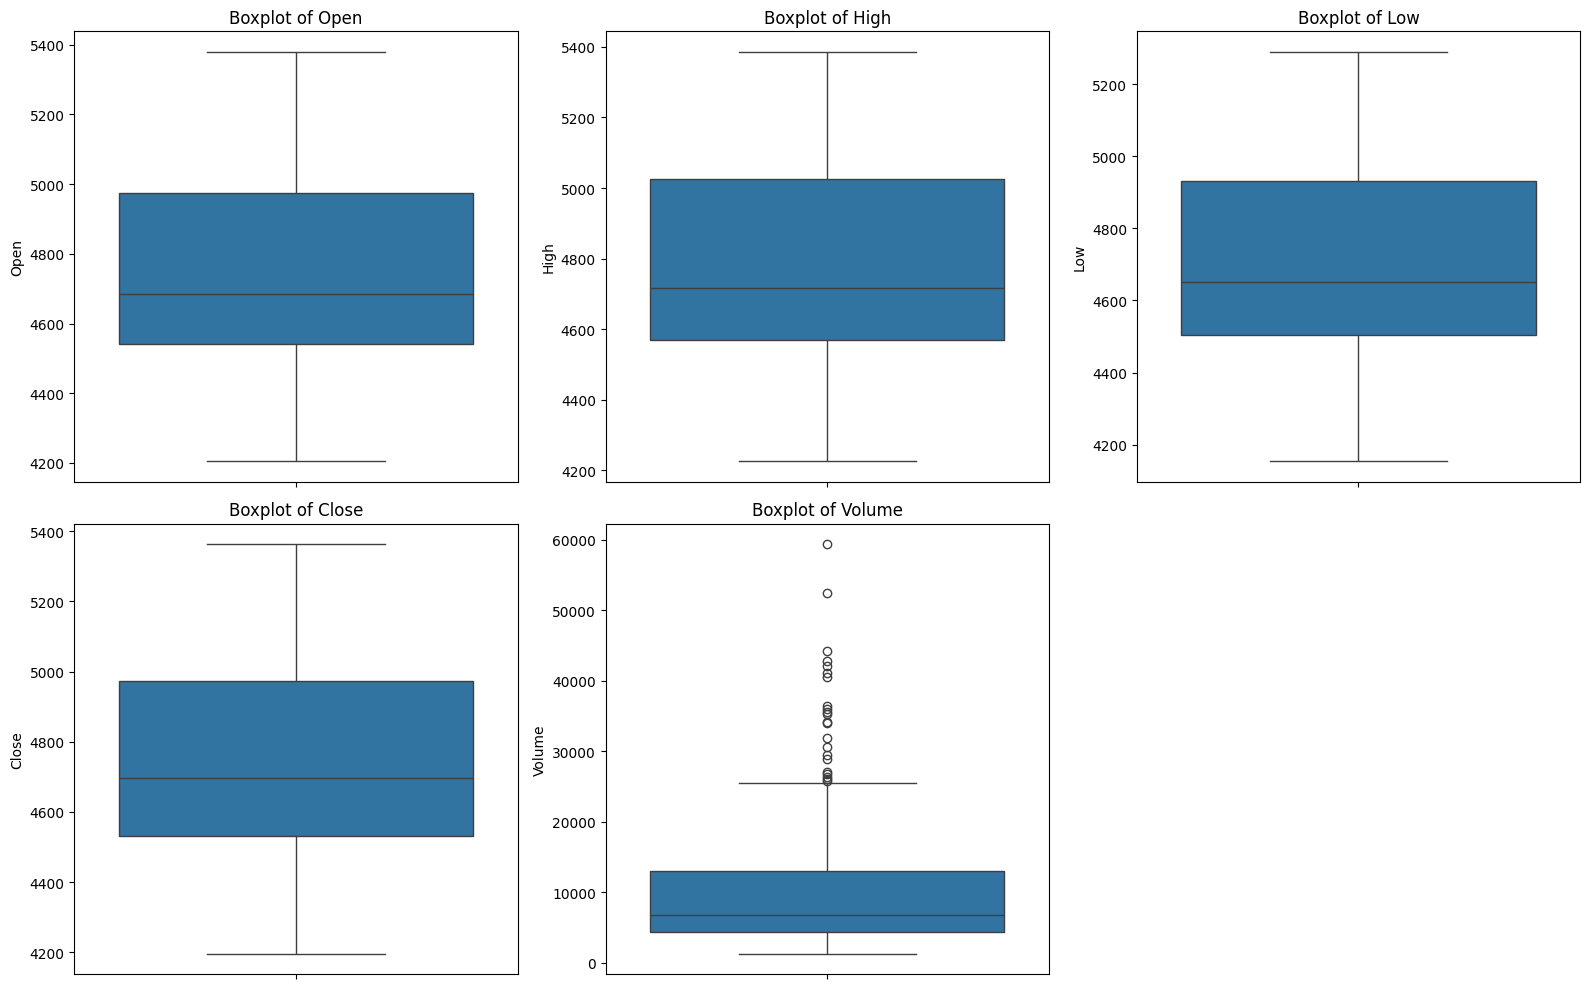

In [19]:
import seaborn as sns
# Setting up the layout for visualization
plt.figure(figsize=(16, 10))

# Plotting boxplots for each numeric column
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.boxplot(data=Britannia[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [21]:
!pip install plotly

In [39]:
import plotly.express as px

# Create the plot
fig = px.line(Britannia, x='Date', y='Close', title='Stock Prices of Britannia', labels={
    'Date': 'Year',
    'Close': 'Price'
})

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Price',
    title={
        'text': 'Stock Prices of Britannia',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=500,
    height=500
)

# Show the plot
fig.show()

In [44]:
# Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Feature selection
Britannia['Day'] = Britannia['Date'].dt.day
Britannia['Month'] = Britannia['Date'].dt.month
Britannia['Year'] = Britannia['Date'].dt.year

In [47]:
# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'Day', 'Month', 'Year']
X = Britannia[features]
y = Britannia['Close']

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [53]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 613.1792092529405
Root Mean Squared Error (RMSE): 24.76245563858602
R-squared (R2): 0.9926212945013169


In [54]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) score: {r2}')

R-squared (R2) score: 0.9926212945013169


#### Comparison of the actual and predicted stock prices

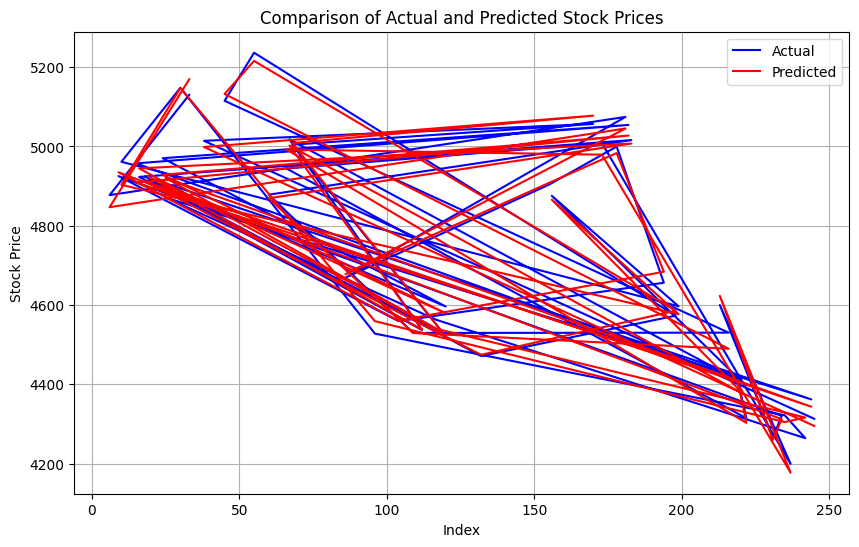

In [55]:
# Plot the comparison between actual and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

The lines are almost overlapping with the actual ones, therefore the model gives 99% accuracy

#### Now predicting it for April 2024 stocks

In [63]:
# Create input features for each day in April 2024
predicted_prices = []
for day in range(1, 31):
    april_features = pd.DataFrame({
        'Open': [Britannia['Open'].iloc[0]] *len(Britannia),  # Taking the first value as an example
        'High': [Britannia['High'].iloc[0]] *len(Britannia),  # Taking the first value as an example
        'Low': [Britannia['Low'].iloc[0]] *len(Britannia),   # Taking the first value as an example
        'Volume': [Britannia['Volume'].iloc[0]] *len(Britannia),  # Taking the first value as an example
        'Day': [day] *len(Britannia),
        'Month':[4] *len(Britannia),
        'Year': [2024] *len(Britannia)
    })

    # Make the prediction
    predicted_price = model.predict(april_features)[2]
    predicted_prices.append(predicted_price)

# Create a DataFrame to store the predicted prices
predicted_prices_df = pd.DataFrame({
    'Date': pd.date_range(start='2024-04-01', end='2024-04-30'),
    'Predicted_Price': predicted_prices
})

print(predicted_prices_df)

         Date  Predicted_Price
0  2024-04-01      4978.712971
1  2024-04-02      4978.746835
2  2024-04-03      4978.780698
3  2024-04-04      4978.814562
4  2024-04-05      4978.848426
5  2024-04-06      4978.882289
6  2024-04-07      4978.916153
7  2024-04-08      4978.950016
8  2024-04-09      4978.983880
9  2024-04-10      4979.017744
10 2024-04-11      4979.051607
11 2024-04-12      4979.085471
12 2024-04-13      4979.119335
13 2024-04-14      4979.153198
14 2024-04-15      4979.187062
15 2024-04-16      4979.220926
16 2024-04-17      4979.254789
17 2024-04-18      4979.288653
18 2024-04-19      4979.322516
19 2024-04-20      4979.356380
20 2024-04-21      4979.390244
21 2024-04-22      4979.424107
22 2024-04-23      4979.457971
23 2024-04-24      4979.491835
24 2024-04-25      4979.525698
25 2024-04-26      4979.559562
26 2024-04-27      4979.593426
27 2024-04-28      4979.627289
28 2024-04-29      4979.661153
29 2024-04-30      4979.695016
